# Import Libraries

In [24]:
# Author: B.Aravind
# Date: 2023-10-04
# Description: Predictive Credit Model notebook

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

 # Load dataset

In [3]:
df = pd.read_csv("Loan Prediction Dataset.csv")

# Basic data exploration

In [5]:
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [7]:
df.fillna({
    'LoanAmount': df['LoanAmount'].mean(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].mean(),
    'Credit_History': df['Credit_History'].mean(),
    'Gender': df['Gender'].mode()[0],
    'Married': df['Married'].mode()[0],
    'Dependents': df['Dependents'].mode()[0],
    'Self_Employed': df['Self_Employed'].mode()[0]
}, inplace=True)

# Feature engineering

In [8]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'] + 1)
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)
df['Total_Income_Log'] = np.log(df['Total_Income'] + 1)

# Data visualization

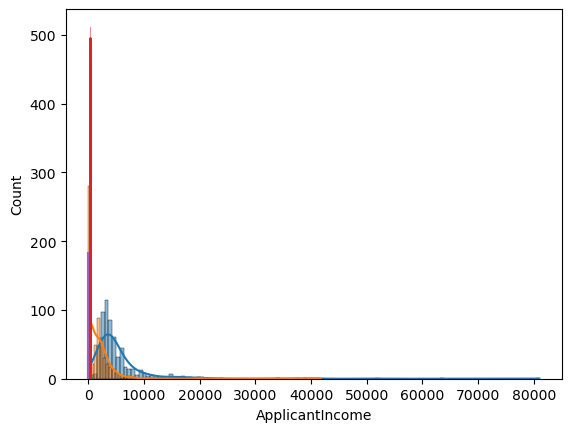

In [10]:
sns.histplot(df['ApplicantIncome'], kde=True)
sns.histplot(df['CoapplicantIncome'], kde=True)
sns.histplot(df['LoanAmount'], kde=True)
sns.histplot(df['Loan_Amount_Term'], kde=True)
sns.histplot(df['Credit_History'], kde=True)
plt.show()

# Correlation heatmap

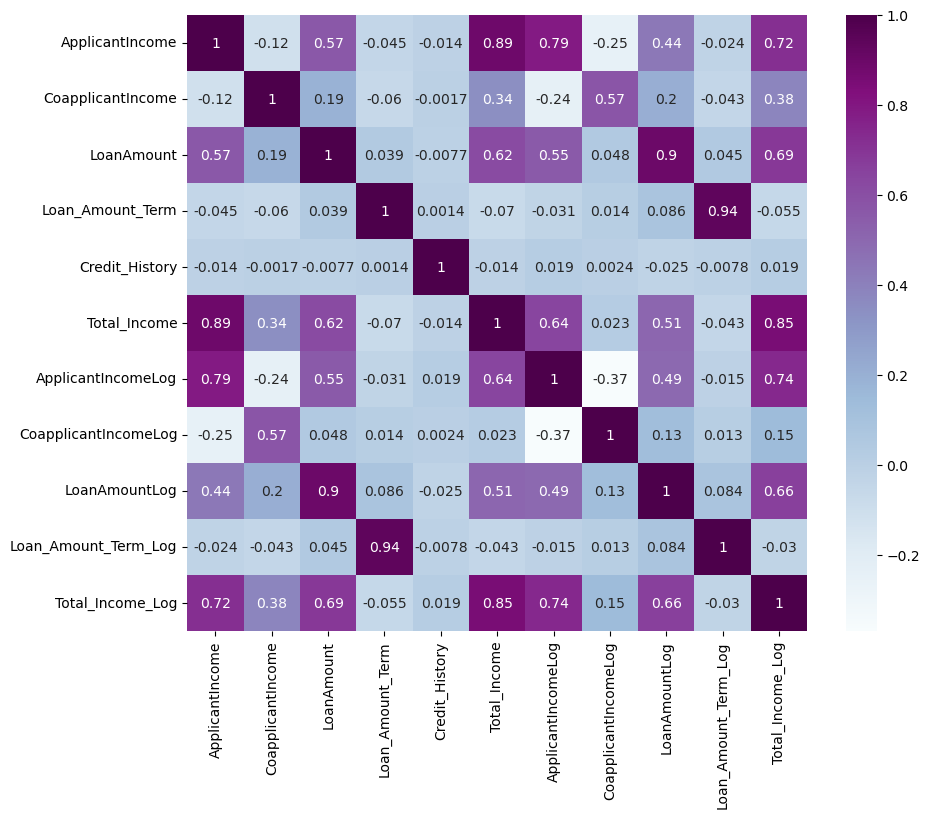

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="BuPu")
plt.show()

In [12]:
cols_to_drop = ['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'CoapplicantIncomeLog']
df.drop(columns=cols_to_drop, inplace=True)

# Preprocess categorical features

In [13]:
def preprocess_data(X):
    categorical_cols = X.select_dtypes(include=['object']).columns
    preprocessor = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)],
        remainder='passthrough'
    )
    return preprocessor.fit_transform(X)

# Train and evaluate models

In [22]:
def classify(model, X, y):
    # Preprocess the data
    X_processed = preprocess_data(X)
    
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42)
    
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Evaluate the model
    accuracy = model.score(x_test, y_test) * 100
    print(f"Accuracy with {model.__class__.__name__}: {accuracy:.2f}%")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()


Testing RandomForestClassifier...
Accuracy with RandomForestClassifier: 70.13%


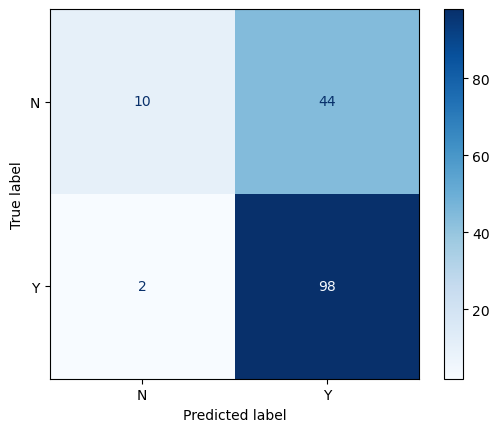

Testing DecisionTreeClassifier...
Accuracy with DecisionTreeClassifier: 73.38%


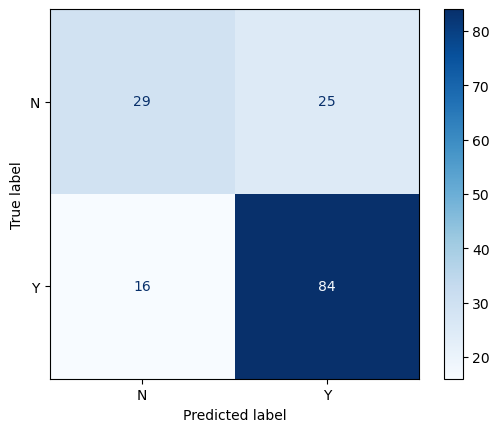

Testing LogisticRegression...
Accuracy with LogisticRegression: 77.27%


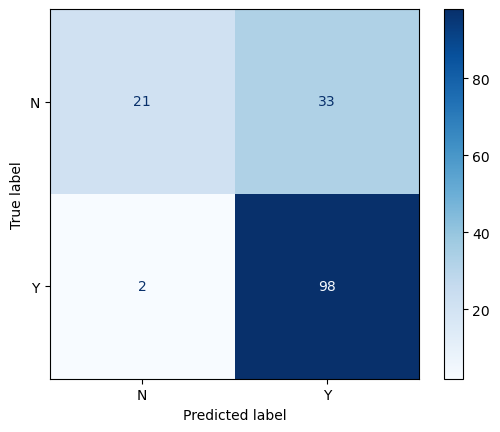

In [23]:
models = {
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    print(f"Testing {name}...")
    classify(model, X, y)